# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to reduce dimensionality and identify clusters in the penguins dataset!

- Begin by reading in `"data/penguins.csv"` as a pandas DataFrame called `penguins_df`, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called `penguins_clean`.
- Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:
    - Create the dummy variables and remove the original categorical feature from the dataset.
    - Scale the data using the standard scaling method.
    - Save the updated data as a new DataFrame called `penguins_preprocessed`.
- Perform Principal Component Analysis (PCA) on the `penguins_preprocessed` dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called `n_components`.
    - Finally, execute PCA using `n_components` and store the result as `penguins_PCA`.
- Employ k-means clustering on the `penguins_PCA` dataset, setting `random_state=42`, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called `n_cluster`.
- Create and fit a new k-means cluster model, setting `n_cluster` equal to your `n_cluster` variable, saving the model as a variable called `kmeans`.
    - Visualize your clusters using the first two principle components.
- Add the `label` column extracted from the k-means clustering (using `kmeans.labels_`) to the `penguins_clean` DataFrame.
- Create a statistical table by grouping `penguins_clean` based on the `"label"` column and calculating the `mean` of each numeric column. Save this table as `stat_penguins`.

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


We will start by checking general information about the dataset, to check if there are null values and/or outliers.

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning.

In [2]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


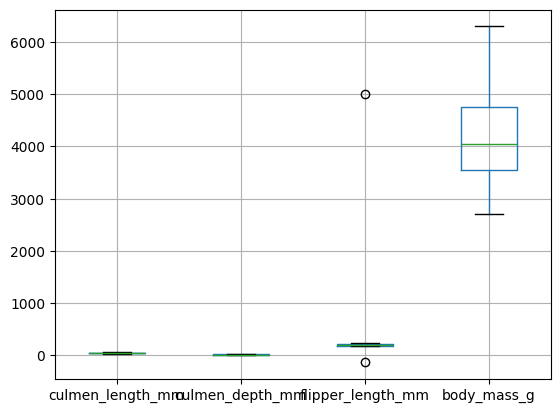

In [3]:
# Boxplot to check for outliers
penguins_df.boxplot()  
plt.show()

According to the analysis there are a few non values in the dataset, and some outliers in the "flipper_length_mm" feature.

In [4]:
# Drop null values
penguins_clean = penguins_df.dropna()

# Identify in which row are located the outliers
outliers_index = penguins_clean[(penguins_clean['flipper_length_mm'] > 4000) | (penguins_clean['flipper_length_mm'] < 0)].index

# Drop outliers
penguins_clean.drop(outliers_index, inplace=True)

# Check dataset
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


/var/folders/q5/n9nsskgd1y7d9jkzzzmv_f780000gn/T/ipykernel_1739/62960907.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean.drop(outliers_index, inplace=True)


There are no more null data or outliers. However, we still need to pre-process the data and add dummy variables, since we need to remove the original categorical feature from the dataset.

In [5]:
# Create dummy variables
df = pd.get_dummies(penguins_clean)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True


In [6]:
# Drop "sex_." column
df.drop("sex_.", axis=1, inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


**Scaling** the data is an important preprocessing step in many machine learning algorithms, including PCA (Principal Component Analysis) and K-means clustering. Here's why scaling is necessary:

1. **Equal Weight to Features**: Scaling ensures that all features contribute equally to the analysis. Since PCA and K-means clustering are both distance-based algorithms, features with larger scales will have a greater impact on the analysis. By scaling the features to have a similar scale, _we prevent features with larger scales from dominating the analysis_.
2. **Improved Convergence**: Scaling helps algorithms converge more quickly. Without scaling, features with larger scales may cause the optimization process to take longer to converge or even prevent convergence altogether. Scaling the features to a similar range can help mitigate this issue and improve the efficiency of the algorithms.
3. **Effective PCA**: PCA works by identifying the directions (principal components) that maximize the variance in the data. If the features have different scales, PCA may prioritize directions with larger scale features, leading to biased principal components. Scaling the features ensures that PCA identifies meaningful directions based on the relative variances of the features.
4. **K-means Clustering**: In K-means clustering, distances between data points are used to assign points to clusters. Features with larger scales will have a larger impact on the distance calculations. Scaling ensures that all features contribute equally to the distance calculations, leading to more balanced cluster assignments.

Overall, scaling the data helps ensure that the algorithms perform optimally and produce meaningful results by removing the impact of different scales among features.


In [7]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# DataFrame with the updated data
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


**Principal Component Analysis (PCA)** is performed on the preprocessed data to reduce dimensionality while preserving most of the variance. _PCA is a dimensionality reduction technique that is often used as a preprocessing step in machine learning_ for several reasons:

1. **Reduction of Dimensionality**: _PCA reduces the number of features in the dataset while preserving the most important information. This is beneficial because high-dimensional data can be computationally expensive to process and may suffer from the curse of dimensionality_.
2. **Collinearity Reduction**: PCA addresses multicollinearity by transforming the original features into a new set of linearly uncorrelated variables called principal components. This helps to remove redundant information and decorrelate the features, which can improve the stability of models that assume independent features.
3. **Interpretability**: The principal components obtained from PCA are ordered by the amount of variance they explain in the data. This allows for the identification of the most important features or patterns in the data, making it easier to interpret and understand the underlying structure.
4. **Noise Reduction**: PCA can help to reduce the effects of noise and irrelevant features in the data. By focusing on the principal components that capture the most variance, PCA can filter out noise and highlight the most salient patterns in the data.
5. **Visualization**: PCA can be used for data visualization by reducing the dimensionality of the data to two or three dimensions, which can then be plotted to visualize the relationships between data points.

Overall, _PCA is a useful tool for reducing the complexity of high-dimensional datasets, improving computational efficiency, addressing multicollinearity, and enhancing interpretability and visualization of data_. These benefits make PCA a common preprocessing technique in many machine learning applications.

In [8]:
# Perform PCA to determine the desired number of components
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)

# Execute PCA using n_components
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

The **Elbow Method** is used to determine the optimal number of clusters for K-means clustering.

The inertia (within-cluster sum of squares) is calculated for different numbers of clusters, and a plot is created to identify the "elbow point" where inertia starts to decrease more slowly. The number of clusters is set based on the identified elbow point.

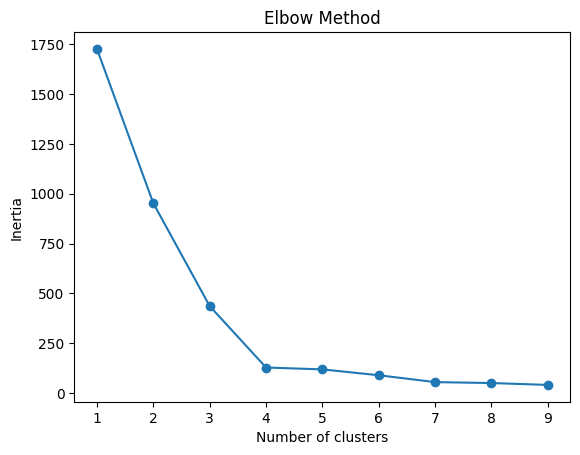

In [9]:
# Employ k-means clustering on the penguins_PCA dataset
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
  
# Elbow analisys 
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

According to the visualization, the optimal number of clusters is 4.

In [10]:
n_clusters = 4

Finally, we can run the k-mean clustering algorithm. The resulting clusters are visualized by plotting the data points in the first two principal components with colors representing different clusters.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


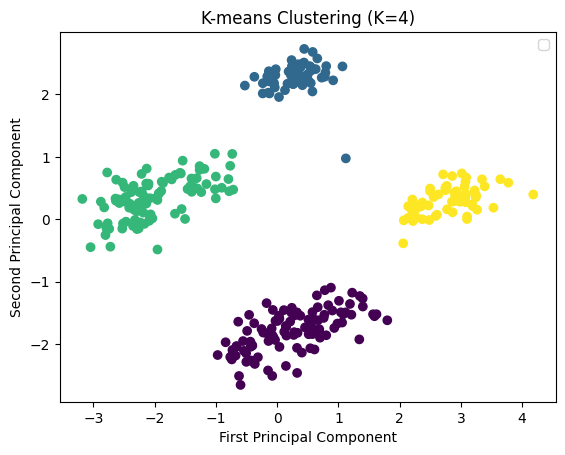

In [11]:
# k-mean clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Visualization
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

As shown in the visualization, it is clear that there are 4 different groups of pinguins.

To finalize this project, we are going to update the dataframe `penguins_clean` adding a new column with the labels related to the groups. Aditionally, a statistical summary DataFrame is created by grouping the dataset by the cluster labels and calculating the mean of numeric columns for each cluster.

In [12]:
# Add "label" column to the DataFrame
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

/var/folders/q5/n9nsskgd1y7d9jkzzzmv_f780000gn/T/ipykernel_1739/2373760416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['label'] = kmeans.labels_


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,0


We have now a summary table indicating the mean values of each numeric column depending on the label.

In [13]:
# Create Statistical table, grouping penguins_clean based on the "label" column and calculating the mean of each numeric column.
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.545763,14.262712,212.779661
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
